<a href="https://colab.research.google.com/github/SidddhantJain/Machine-Learning-Lab/blob/main/ML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset (2)/Salaries_pd.csv")

# Drop irrelevant or mostly empty columns
df.drop(['Id', 'EmployeeName', 'Notes', 'Status', 'Agency', 'Benefits'], axis=1, inplace=True)

# Handle missing values
df.replace('Not Provided', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert columns to numeric
numeric_cols = ['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

<ipython-input-27-6e5db0975e9c>:2: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Dataset (2)/Salaries_pd.csv")


In [ ]:
df.replace('Not Provided', np.nan, inplace=True)

cols_to_numeric = ['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df.dropna(subset=cols_to_numeric, inplace=True)


In [ ]:
# Only keep columns that still exist
cols_to_numeric = ['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing numeric values
df.dropna(subset=cols_to_numeric, inplace=True)


In [ ]:
# Fill missing categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numeric columns with median
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())


In [ ]:
# Only keep columns that still exist
cols_to_numeric = ['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing numeric values
df.dropna(subset=cols_to_numeric, inplace=True)


In [ ]:
# Check for NaN or invalid values in 'TotalPay'
print("Before qcut:\n", df['TotalPay'].describe())
print("Missing TotalPay values:", df['TotalPay'].isnull().sum())


Before qcut:
 count    148045.000000
mean      75057.851048
std       50409.761170
min        -618.130000
25%       36958.160000
50%       71644.710000
75%      106028.000000
max      567595.430000
Name: TotalPay, dtype: float64
Missing TotalPay values: 0


In [ ]:
df = df[df['TotalPay'].notnull()]  # Ensure TotalPay is clean


In [ ]:
# Use quantile binning to create salary category
df['salary_category'] = pd.qcut(df['TotalPay'], q=3, labels=['Low', 'Medium', 'High'])

# Confirm it was created
print(df[['TotalPay', 'salary_category']].head())


    TotalPay salary_category
0  567595.43            High
1  538909.28            High
2  335279.91            High
3  332343.61            High
4  326373.19            High


In [ ]:
df['TotalPay'] = pd.to_numeric(df['TotalPay'], errors='coerce')
# Feature matrix and label vector
X = df[['BasePay', 'OvertimePay', 'OtherPay']]
y = df['salary_category']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train model
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9363369245837414

Classification Report:
               precision    recall  f1-score   support

        High       0.95      0.89      0.92      9852
         Low       0.99      0.96      0.98      9944
      Medium       0.88      0.96      0.91      9813

    accuracy                           0.94     29609
   macro avg       0.94      0.94      0.94     29609
weighted avg       0.94      0.94      0.94     29609



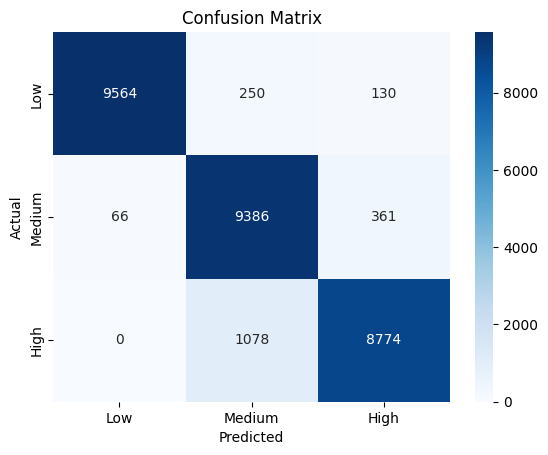

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


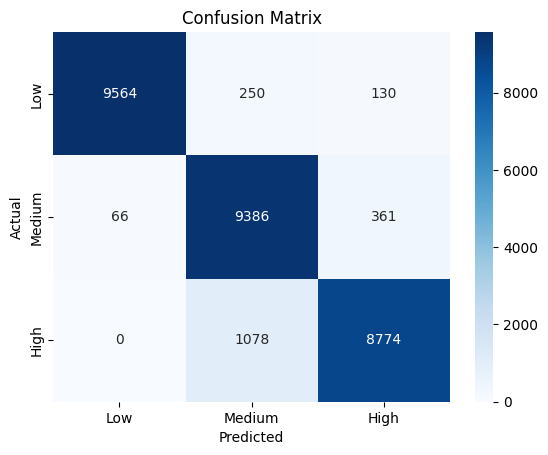

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<ipython-input-45-e9af32831a89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='salary_category', palette='Set2')


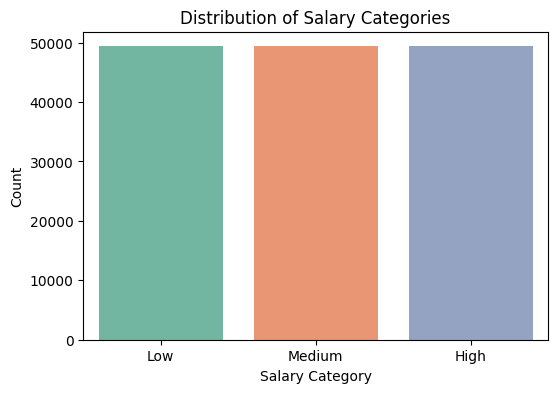

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='salary_category', palette='Set2')
plt.title("Distribution of Salary Categories")
plt.xlabel("Salary Category")
plt.ylabel("Count")
plt.show()


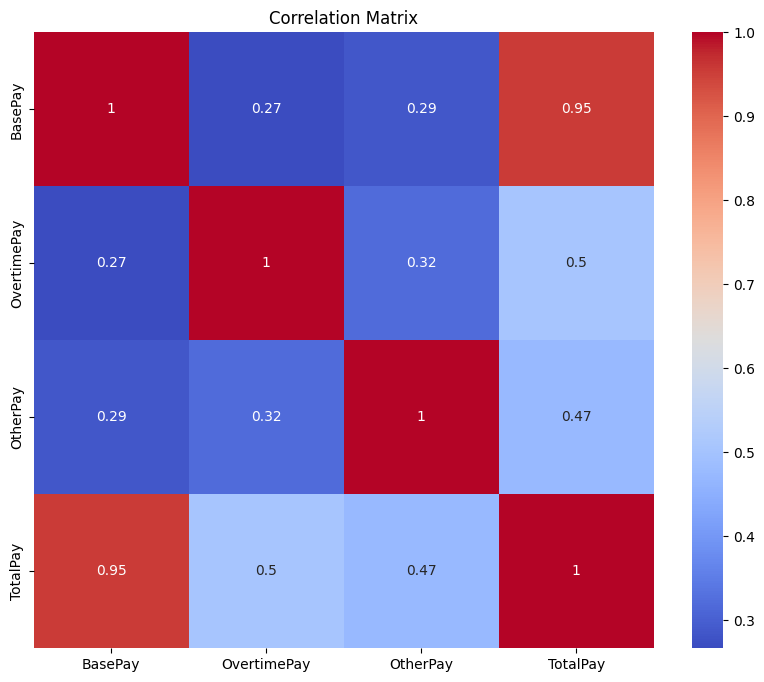

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


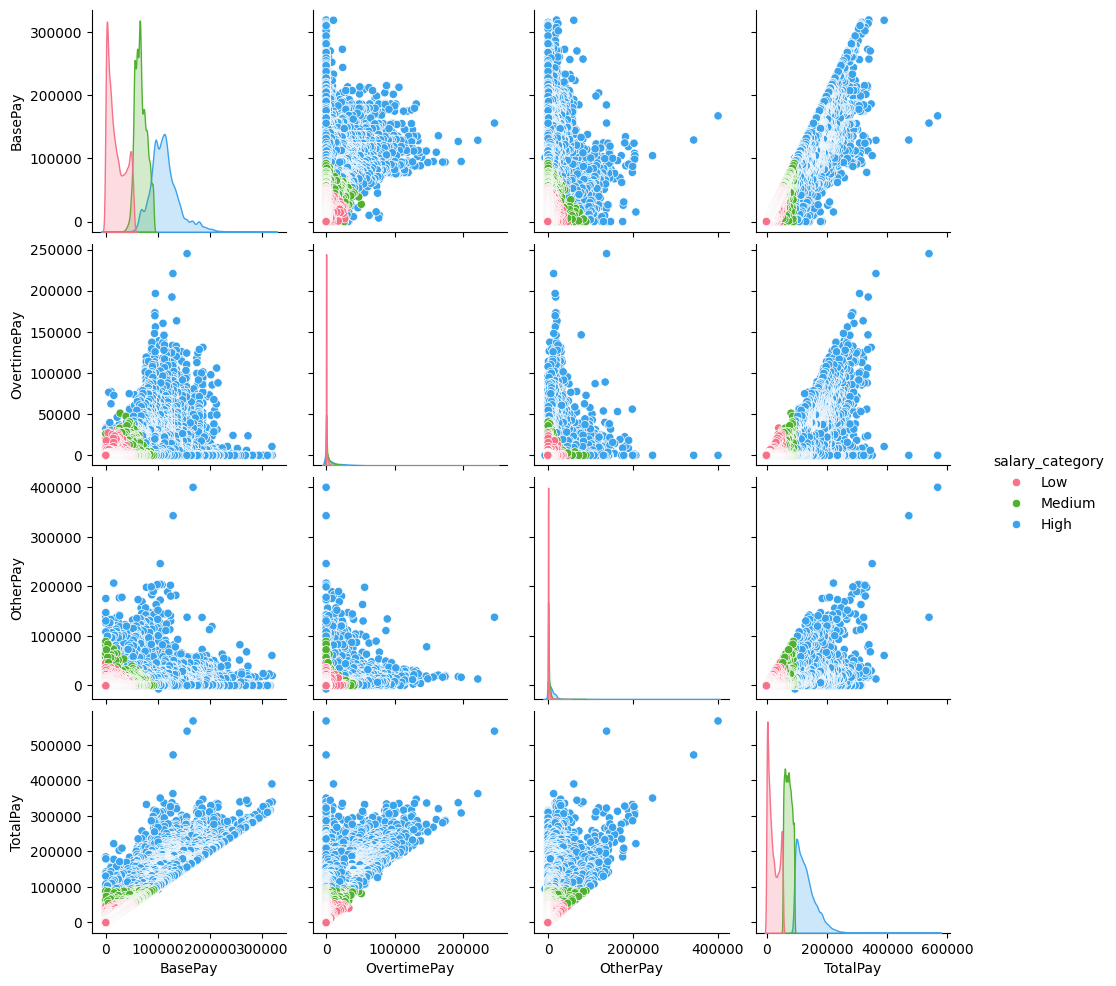

In [ ]:
sns.pairplot(df[['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'salary_category']], hue='salary_category', palette='husl')
plt.show()



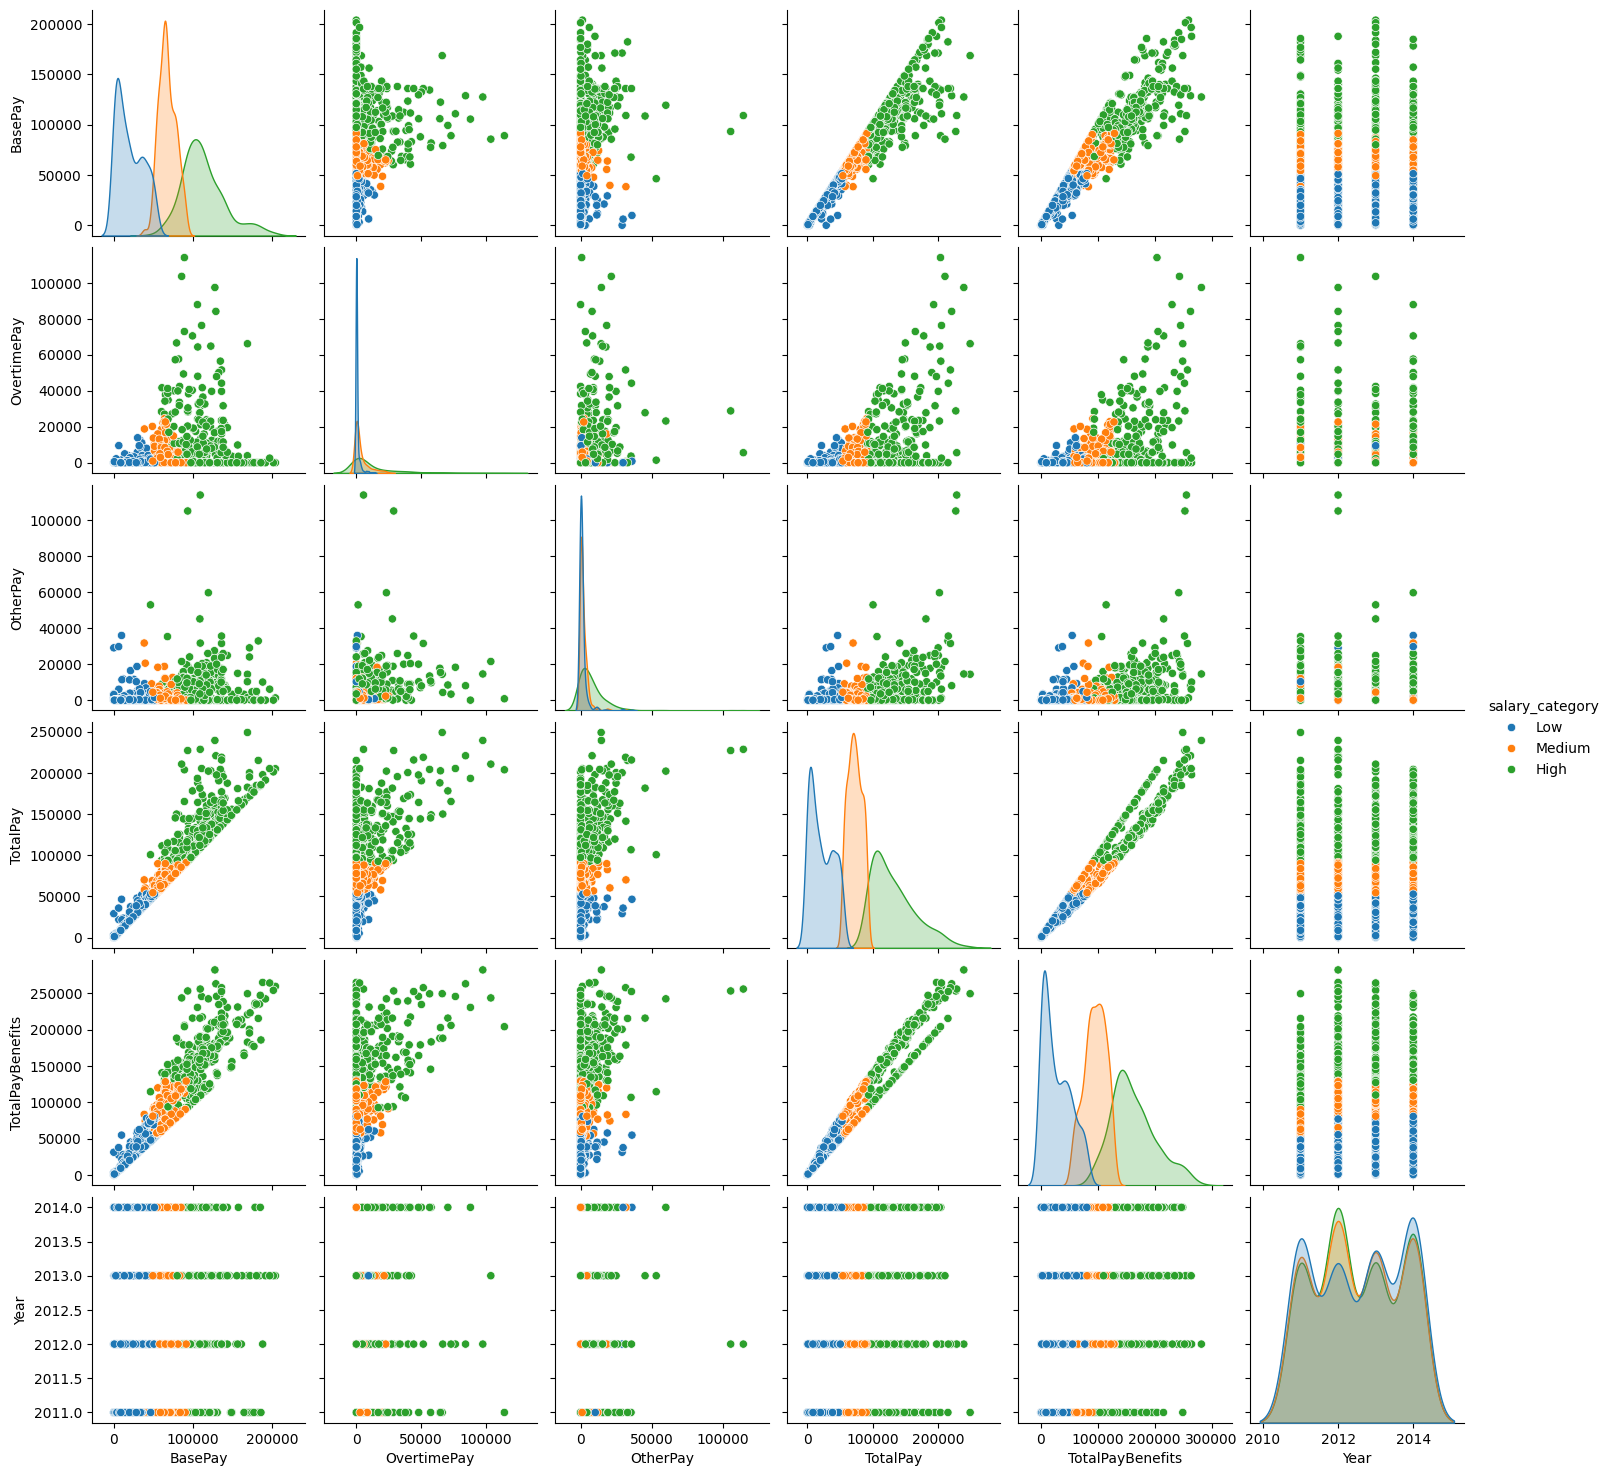

In [ ]:
sns.pairplot(df.sample(1000), hue='salary_category')

<Figure size 600x600 with 0 Axes>

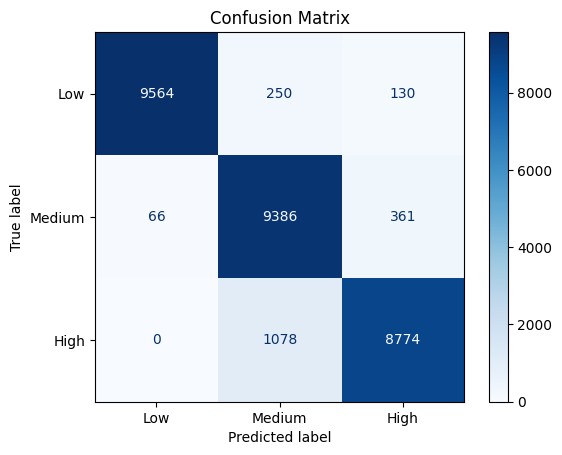

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# After predictions
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Medium', 'High'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.95      0.89      0.92      9852
         Low       0.99      0.96      0.98      9944
      Medium       0.88      0.96      0.91      9813

    accuracy                           0.94     29609
   macro avg       0.94      0.94      0.94     29609
weighted avg       0.94      0.94      0.94     29609



In [ ]:
# Predict
y_pred = model.predict(X_test)

# Results
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))


✅ Accuracy: 0.8532110091743119

📊 Confusion Matrix:
 [[57  5  0]
 [ 8 34  2]
 [ 0  1  2]]

📄 Classification Report:
               precision    recall  f1-score   support

         Low       0.88      0.92      0.90        62
      Medium       0.85      0.77      0.81        44
        High       0.50      0.67      0.57         3

    accuracy                           0.85       109
   macro avg       0.74      0.79      0.76       109
weighted avg       0.86      0.85      0.85       109



In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize and train Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)


In [ ]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
